<b>Auto encoder architecture </b><br>
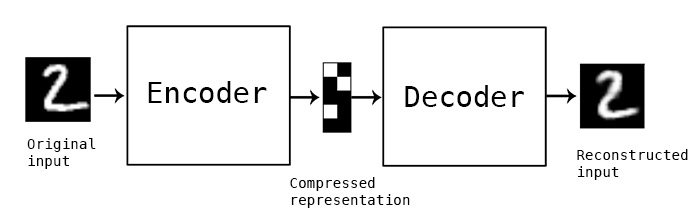
<br>
"Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.

<i>source : https://blog.keras.io/building-autoencoders-in-keras.html</i>



We will be using auto encoder for dimensionality reduction 

In [ ]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [ ]:
#importing dataset
mnist = tf.keras.datasets.mnist
#we only need images not labels
(x, y), (_, _) = mnist.load_data()
x= x/255.0

In [ ]:
print("number of images ", x.shape[0])
print("dimension of each image ", x[0].shape)

number of images  60000
dimension of each image  (28, 28)


In [ ]:
y =  x.reshape(60000,784)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#      Model training 




In [ ]:
#encoder model with uniform he - init for relu
encoder = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation= 'relu' ),
  tf.keras.layers.Dropout(.3),
  tf.keras.layers.Dense(128, activation= 'relu' ),
  tf.keras.layers.Dropout(.3),
  tf.keras.layers.Dense(64, activation= 'relu' ),
  tf.keras.layers.Dropout(.3),
  tf.keras.layers.Dense(2, activation= 'relu' )
])

In [ ]:
#decoder model with uniform he - init for relu
decoder= tf.keras.models.Sequential([
   tf.keras.layers.InputLayer(2),
   tf.keras.layers.Dense(64, activation= 'relu' ),
   tf.keras.layers.Dropout(.3),
   tf.keras.layers.Dense(128, activation= 'relu' ),
   tf.keras.layers.Dropout(.3),
   tf.keras.layers.Dense(256, activation= 'relu' ),
   tf.keras.layers.Dropout(.3),
   tf.keras.layers.Dense(784, activation= 'relu' )
                                     
])

In [ ]:
autoencoder = tf.keras.models.Sequential([encoder,decoder])

In [ ]:
autoencoder.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_46 (Sequential)   (None, 2)                 242242    
_________________________________________________________________
sequential_47 (Sequential)   (None, 784)               243024    
Total params: 485,266
Trainable params: 485,266
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_fn = tf.keras.losses.MeanSquaredError()

In [ ]:
autoencoder.compile(optimizer= tf.keras.optimizers.Adam(),
              loss=loss_fn)

In [ ]:
autoencoder.fit(x,y,batch_size=256,epochs=50)

Epoch 1/50
235/235 [==============================] - 12s 52ms/step - loss: 0.0653
Epoch 2/50
235/235 [==============================] - 12s 52ms/step - loss: 0.0555
Epoch 3/50
235/235 [==============================] - 12s 52ms/step - loss: 0.0526
Epoch 4/50
235/235 [==============================] - 12s 53ms/step - loss: 0.0506
Epoch 5/50
235/235 [==============================] - 12s 53ms/step - loss: 0.0494
Epoch 6/50
235/235 [==============================] - 12s 53ms/step - loss: 0.0486
Epoch 7/50
235/235 [==============================] - 12s 50ms/step - loss: 0.0478
Epoch 8/50
235/235 [==============================] - 12s 52ms/step - loss: 0.0472
Epoch 9/50
235/235 [==============================] - 12s 52ms/step - loss: 0.0467
Epoch 10/50
235/235 [==============================] - 13s 56ms/step - loss: 0.0464
Epoch 11/50
235/235 [==============================] - 12s 53ms/step - loss: 0.0460
Epoch 12/50
235/235 [==============================] - 12s 50ms/step - loss: 0.0457
E

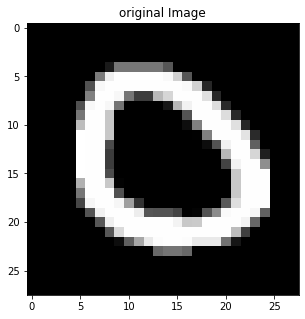

In [ ]:
#display or plot a number 

plt.figure(figsize =(5,5))


idx=random.randint(0,60000)

img = x[idx]
plt.title("original Image")

plt.imshow(img, interpolation ='none',cmap='gray')
plt.show()

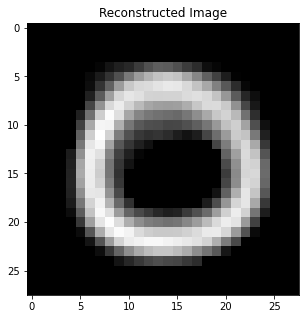

In [ ]:
img_= autoencoder.predict(x[idx:idx+1])
plt.figure(figsize =(5,5))
img_= img_.reshape(28,28)
plt.title("Reconstructed Image")
plt.imshow(img_, interpolation ='none',cmap='gray')
plt.show()

#  Dimensionality Reduction

In [ ]:
# using encoder to project 784 dimensional points onto 2 dimensional space
x_ = encoder.predict(x)
print("dimension of x_ " , x_.shape)


dimension of x_  (60000, 2)


In [ ]:
# creating a new data frame which help us in ploting the result data
data = np.vstack((x_.T, y)).T
df = pd.DataFrame(data=data, columns=("Dim_1", "Dim_2", "label"))

In [ ]:
df.head()

,Dim_1,Dim_2,label
0,0.967187,18.209238,5.0
1,96.409927,55.385273,0.0
2,3.674969,5.207809,4.0
3,0.000000,0.076010,1.0
4,0.427470,0.607212,9.0


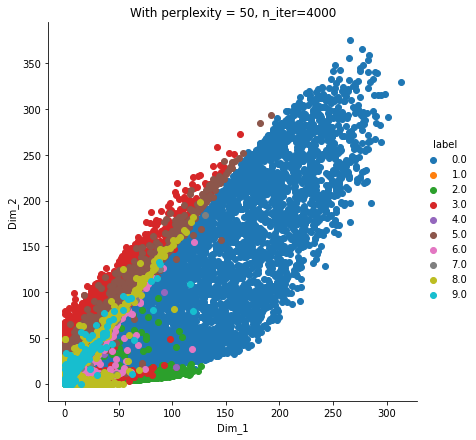

In [ ]:
import seaborn as sns
sns.FacetGrid(df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title()
plt.show()